In [1]:
import array
import numpy as np
import os
from matplotlib.pyplot import *

# 1) Read the file
The file contains doubles characterizing contacts between a protein residue and a ligand atom. Each entry contains 5 numbers:

 -- protein residue type (it was originally an int)
 
 -- ligand atom type (it was originally an int)
 
 -- distance
 
 -- theta angle (between the vector and Z, 0-pi)
 
 -- psi angle (between the vector projection and X, 0-2pi)

Protein atom type varies from 0 to n_amino_res_types - 1.

Ligand atom type varies from 0 to n_ligand_atom_types - 1.

In [2]:
data_path = './korp_stats.bin'
double_size = 8

n_nums = int(os.path.getsize(data_path)/double_size)
n_content = 5
if n_nums % n_content != 0:
    print("Oops, something went wrong with the file size and contents.")
n_entries = int(n_nums/n_content)
F = open(data_path, 'rb')
data = array.array('d')
data.fromfile(F, n_nums)
F.close()
data = np.array(data)
data = np.reshape(data, (n_entries, n_content))
print(np.shape(data))

(47916041, 5)


In [3]:
n_amino_res_types = 21
n_ligand_atom_types = 40

In [5]:
from tqdm import tqdm_notebook

# 2) Let's plot the map of counts

In [6]:
%matplotlib inline
count_matrix = np.zeros((n_amino_res_types, n_ligand_atom_types))
for entry in tqdm_notebook(data):
    count_matrix[int(entry[0])][int(entry[1])] += 1

KeyboardInterrupt: 

now sns heatmap
done


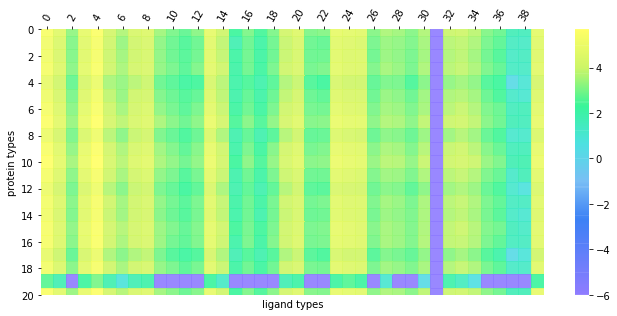

In [7]:

# we can visualize the contacts map
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

def CustomCmap(cols):
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, col in enumerate(cols):
        if len(cdict['red']) == 0:
            cdict['red'].append((0, col[0], col[0]))
            cdict['green'].append((0, col[1], col[1]))
            cdict['blue'].append((0, col[2], col[2]))
        elif len(cdict['red']) == len(cols) - 1:
            cdict['red'].append((1, col[0], col[0]))
            cdict['green'].append((1, col[1], col[1]))
            cdict['blue'].append((1, col[2], col[2]))
        else:
            cdict['red'].append(((i+1)/len(cols), col[0], col[0]))
            cdict['green'].append(((i+1)/len(cols), col[1], col[1]))
            cdict['blue'].append(((i+1)/len(cols), col[2], col[2]))
    cdict['red'] = tuple(cdict['red'])
    cdict['green'] = tuple(cdict['green'])
    cdict['blue'] = tuple(cdict['blue'])

    cmap = LinearSegmentedColormap('custom_cmap', cdict)
    return cmap

cmap1 = CustomCmap(np.array([[142, 123, 255], [59, 128, 245], [120, 190, 245], [75, 225, 225], [55, 245, 153], [204, 245, 102], [255, 255, 100]])/255,)
a = axes()
count_matrix[np.where(count_matrix == 0)] = 0.000001
count_matrix = np.log10(count_matrix)
print('now sns heatmap')
sns.heatmap(count_matrix, ax=a, cmap=cmap1,  linewidths=.0, alpha=0.9)
print('done')
# a.set_aspect(1)
tick_label_fs = 10
a.set_xlabel('ligand types')
a.set_ylabel('protein types')
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_label_fs)
    tick.label.set_rotation(0)
a.xaxis.tick_top()
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_label_fs)
    tick.label.set_rotation(90)
xticks(rotation=60)
fig = a.get_figure()
fig.set_size_inches(9.5, 4.5)
tight_layout()
show()

# 3) Distribution check.

Now let's plot the distributions of angles for different values of the distance.

In [44]:
# # I needed this for tests to read the data from txt
# def get_data(fname):
#     dat_points_loc = [[] for i in range(0, 20)]
#     with open(fname, 'r') as F:           
#         for ln_ in F:
#             ln = ln_.replace('\n', '').split()
#             if len(ln) == 5 and ln[0][0].isdigit():
#                 dat_points_loc[int(float(ln[2]))].append([float(ln[i]) for i in range(2, 5)])
#     for i in range(len(dat_points_loc)):
#         dat_points_loc[i] = np.array(dat_points_loc[i])
#     return dat_points_loc


# dat_points = get_data('/media/hdd1/data/pdbbind/2016/dist_stats_0_C_ar6.txt')

# %matplotlib inline
# gcf().set_size_inches((20, 10))
# for dp in range(3, 20):
#     hist(dat_points[dp][:, 2], bins=100, histtype='step', color=colors[dp], density=False, label=str(dp))
# legend()

In [8]:
from matplotlib import cm

start = 0.0
stop = 1.0
number_of_lines= 20
cm_subsection = np.linspace(start, stop, number_of_lines) 

colors = [ cm.jet(x) for x in cm_subsection ]


Let's take the protein type 0 (alanine) and ligand type 1 (carbon in phenyl group/benzene)

In [9]:
%matplotlib inline
data_local = data[np.where((data[:, 0] == 0.) & (data[:, 1] == 1.))][:, 2:]
data_binned = []
for i in range(0, 20):
    data_binned.append(data_local[np.where(np.floor(data_local[:, 0]) == i)])

1) The psi angle (histogram is normalized)

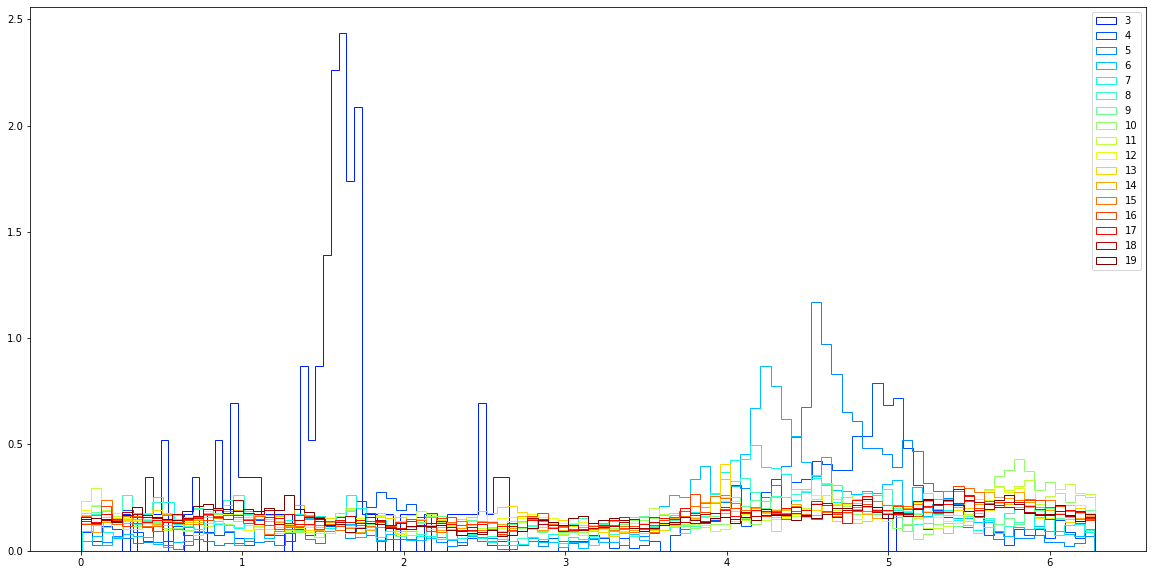

In [10]:
gcf().set_size_inches((20, 10))
for dp in range(3, 20):
    hist(data_binned[dp][:, 2], bins=100, histtype='step', color=colors[dp], density=True, label=str(dp))
legend()

Here, at the small distances (~ <= 5) we have a very small number of contacts.
Later, on greater distances (~ > 14) the distribution should become more or less uniform, because the interatomic interactions almost dissappear at these distances. For example, the current version of the statistical potential works with the distance cutoff = 11 A. But you should check that the distributions become uniform in all cases to be sure.

We have forgotten about the theta angle!

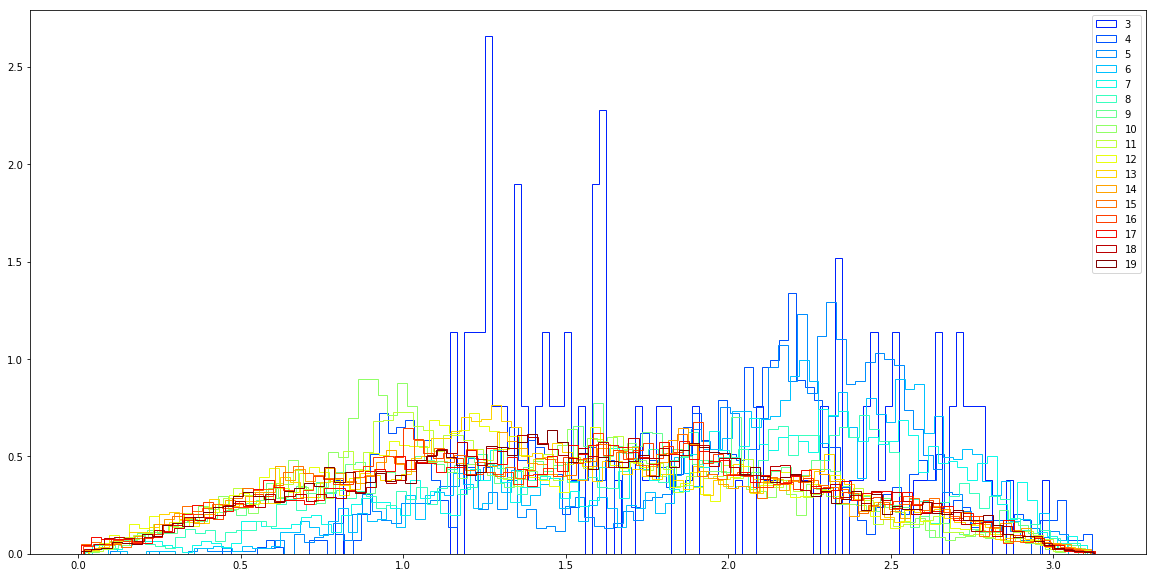

In [51]:
gcf().set_size_inches((20, 10))
for dp in range(3, 20):
    hist(data_binned[dp][:, 1], bins=100, histtype='step', color=colors[dp], density=True, label=str(dp))
legend()

Oops, the distribution doesn't look as a uniform one on the big distance!
It happens because of the fact that for uniformly distributed points on the sphere the number of points in the bins corresponding to the poles (theta ~ 0 and theta ~ pi) will be always smaller than on the equator. 
http://corysimon.github.io/articles/uniformdistn-on-sphere/
There are some ways to handle it.
In our code we use a sphere tesselation algorithm that splits the sphere into the pieces of equal area.

I copy-pasted it from our collaborator's code and added visualization.
Please, run this with %matplotlib for external visualization (without inline) or as a standalone script.

# 4) Uniform sampling on a sphere 

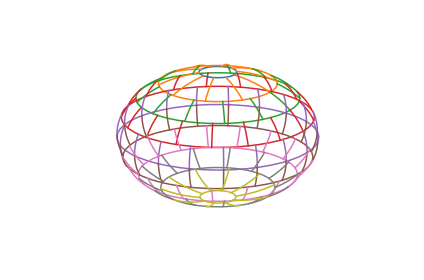

In [12]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# def easy_sphere():
fig = figure()
ax = fig.add_subplot(111, projection='3d')

n_samples = 1000
n_samples_surface = 50
thetas = np.random.uniform(0., np.pi, n_samples)
phis = np.random.uniform(0., 2 * np.pi, n_samples)
rho = 1
rho1 = rho - 0.01
xs = rho*np.sin(thetas)*np.cos(phis)
ys = rho*np.sin(thetas)*np.sin(phis)
zs = rho*np.cos(thetas)
sphere_thetas = np.linspace(0, np.pi, n_samples_surface)
sphere_phis = np.linspace(0, 2 * np.pi, n_samples_surface)
sphere_xs = rho1 * np.outer(np.sin(sphere_thetas), np.cos(sphere_phis))
sphere_ys = rho1 * np.outer(np.sin(sphere_thetas), np.sin(sphere_phis))
sphere_zs = rho1 * np.outer(np.cos(sphere_thetas), np.ones(n_samples_surface))
# ax.plot_surface(sphere_xs, sphere_ys, sphere_zs, color='#EFEFEF', alpha=1)
# ax.scatter(xs, ys, zs)


class Mesh:
    def __init__(self):
        self.ncells = 0       # Number of constant areas (cells)
        self.nring = 0        # Output total number of rings (including polar caps, "nring" size)
        self.ncellsring = []  # Number of cells per ring (including polar caps, "nring" size)
        self.icell= []        # Index of the first cell of each ring from north pole (including polar caps, "nring" size)
        self.theta = []       # Ring boundaries array, i.e. Latitudes (Theta) [Radians] (including polar caps, "nring" size)
        self.dpsi = []        # Psi increment per ring [Radians] (including polar caps, "nring" size)

ncells = 120

mymesh = Mesh()
ncells = np.round(ncells/2)*2  # Number of cells must be even
mymesh.ncells = ncells         # Output cells number
idep = ncells/2.
nim1 = idep
tim1 = np.pi/2.
rim1 = np.sqrt(2.)
nan = 0
nring = int(np.floor(np.sqrt(idep)))    # Estimated number of rings
n = [0 for i in range(nring)]           # Array with the number of cells in each disk i
ti = 0.
ri = 0.
ni = 0
for i in range(nring):          # Loop on the rings or disks
    n[i] = nim1                 # Number of cells in disk i
    ti = tim1 - np.sqrt(2 * np.pi / idep)      # Zenithal angle (20)
    ri = 2 * np.sin(ti / 2)                    # Equivalent projection (16)
    ni = round(nim1 * ri * ri/(rim1 * rim1))   # Number of cells (1)
    nim1 = ni
    rim1 = ri
    tim1 = ti
    if nim1 == 2:
        nim1 = 1                # Forcing presence of polar disks
    if nim1 == 0:
        nim1 = 1
    if nim1 == 1:
        if nan == 0:
            nan = i+1

nan += 1                       # In Matlab "i" runs from 1 to "nring", in C from 0 to "nring-1"
mymesh.nring = nan*2           # Output total number of rings (including polar caps)
mymesh.icell = [0 for i in range(nan*2)]  # Incremental array with the number of cells per ring

for i in range(nan):
    mymesh.icell[nan-1-i] = n[i]

for i in range(nan, nan*2-1):
    mymesh.icell[i] = 2*n[0] - n[i-nan+1]
mymesh.icell[nan*2-1] = ncells


Nc = nan*2-1
Nt = mymesh.icell[Nc]                         # Total number of cells
mymesh.ncellsring = [0 for i in range(nan*2)] # Number of cells per ring (including polar caps)
for i in range(0, nan*2 - 2):
    mymesh.ncellsring[i+1] = mymesh.icell[i+1] - mymesh.icell[i]
mymesh.ncellsring[0] = 1
mymesh.ncellsring[nan*2 - 1] = 1              # polar caps
# print(mymesh.ncellsring)

mymesh.theta = np.zeros(nan*2)    # Ring boundaries Latitudes (Theta) SPHERE
for i in range(0, nan * 2):
    mymesh.theta[i] = np.arccos(1 - 2.*mymesh.icell[i]/Nt)


# This is the only required for meshing in Polar coordinates
mymesh.dpsi = np.zeros(nan*2)  # Psi increment for each ring

for i in range(0, nan * 2):                         # Screen rings (including polar caps) (Theta)
    mymesh.dpsi[i] = 2*np.pi/mymesh.ncellsring[i]   # Psi increment for current ring (constant within current ring)

# It transforms the indices to the bin indices
#
# Transform "S" into "icell" (index of first cell per ring)
# for i in range(nan*2-1, 0, -1):  # Screen rings (reverse order)
#     mymesh.ncellsring[i] = mymesh.ncellsring[i-1]
# mymesh.ncellsring[0] = 0
# print(mymesh.ncellsring)


np.set_printoptions(linewidth=120)

# for i in range(nan * 2):
#     print(mymesh.theta[i], mymesh.ncellsring[i], mymesh.dpsi[i])

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

for i, ring_theta in enumerate(mymesh.theta[:-1]):
    ring_xs = rho*np.cos(sphere_phis)*np.sin(ring_theta)
    ring_ys = rho*np.sin(sphere_phis)*np.sin(ring_theta)
    ring_zs = rho*np.ones(n_samples_surface)*np.cos(ring_theta)
#     print(ring_theta)
    ax.plot(ring_xs, ring_ys, ring_zs, color=new_colors[i])

theta_0 = 0.
for i, ring_psi in enumerate(mymesh.dpsi):
    local_thetas = np.linspace(theta_0, mymesh.theta[i], n_samples_surface)
    theta_0 = mymesh.theta[i]
#     print(mymesh.ncellsring[i])
    for icell in range(int(mymesh.ncellsring[i])):
        if mymesh.ncellsring[i] < 2:
            continue
        ring_xs = rho*np.cos(ring_psi * icell)*np.sin(local_thetas)
        ring_ys = rho*np.sin(ring_psi * icell)*np.sin(local_thetas)
        ring_zs = rho*np.ones(n_samples_surface)*np.cos(local_thetas)
        ax.plot(ring_xs, ring_ys, ring_zs, color=new_colors[i])

ax.set_axis_off()
#ax.set_aspect('equal')
tight_layout()
show()

Probabilistic metric space to model orientation dependent states 
(for fast protein and loop modelling)

The project goal is to rank the set of reference proteins, generated from the same set of amino-acids, according to the statistical similarity of the observed protein structure to the structures of reference proteins from the PDB.

Briefly, one has to assess does an observed protein looks like a typical reference protein or not, according to some criterion, which are not constructed yet. We have to construct these criterions and to propose the assessment method. 

The basic element of the methodology is the probability distribution of the mutual orientations between
two amino-acids 
an amino-acid a small molecule.
Here the first case follows. 

Denote by $\mathcal A^2\ni(a,b)$  the alphabet all unsorted pairs of amino-acids, 20 amino-acids make 210 pairs. Denote by $p^{a,b}(\omega,r)$ the (joint, conditional, marginal: see Problems) probability distribution of the angular orientation $\omega$ given the distance $r$. Denote by $d = D_{KL}(p,p^\prime)$ the distance between two distributions, 210 pairs of amino-acids make 21945 distances. Let $d\sim\mathcal{N}(d_\text{ref}, \Sigma_\text{obs})$. So this distance vector produce the metric space to rank proteins according to the quadratic form
$$
E = (\mathbf{d}_\text{obs} - \mathbf{d}_\text{ref})^\mathsf{T}) \Sigma_\text{ref}^{-1} ().
$$
how far an observed protein from the nearest stable reference subset from the PDB. The reference subset is extracted using the collaborative filtering (topic modeling). The cartesian product is formed by the sets {A^2} and proteins, described by the vector p.

Urgent to check:
The distribution $p(\omega,r)$ must tend to uniform when $r$ tends to $\inf$. In fact after $r>r^*$.


Problems to be resolved:
the distance $r$ is not a random variable
analysis of the energy distribution function














 
References:
KORP: knowledge-based 6D potential for fast protein and loop modeling
José Ramón López-Blanco,  Pablo Chacón
Improving the orientation-dependent statistical potential using a reference state.
Liu Y1, Zeng J, Gong H.


Analysis:
This problem statement answers to the following questions
How to avoid unnecessary aggregation making the protein description?
How to include pairs of couples in the model?
How to ensure instability of the reference protein description?

Both approaches consider the great variability of proteins.










Appendix figures:


Motivation for the PDB and CASP challenge 

Motivation for the Energy approach








You can use the cells as bins to check the uniformness of the angular distribution.